# Project2 - Car Price Prediction

## Import Packages

In [3]:
import numpy as np                                        # Numpy to carry out mathematical calculations
import pandas as pd                                       # Pandas to create and manipulate dataframe
import matplotlib.pyplot as plt                           # Matplotlib to plot the data points onto a graph
import seaborn as sns                                     # Seaborn to carry out statistical graphical functions 
import sklearn
import warnings
warnings.filterwarnings('ignore')

### [1] Loading Dataset

In [4]:
df=pd.read_csv('J:\Courses\Oasis Infobyte (Internship)\Projects\Pro 3 (Car Price prediction - ML)\car data.csv')
df.head()                                        # To get top 5 rows from table

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### [2] Feature Engineering (Data Cleaning)

In [5]:
# Finding information about data using info in pandas
df.info()                 # shows datatype of column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### 2.1 Handling Null Values

In [6]:
# Checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Since, there are no null vakues we can move to next step

### EDA

#### Categorical Data

In [8]:
# Fuel_Type vs Selling_Price
# Selling_type vs Selling_Price
# Transmission vs Selling_Price 

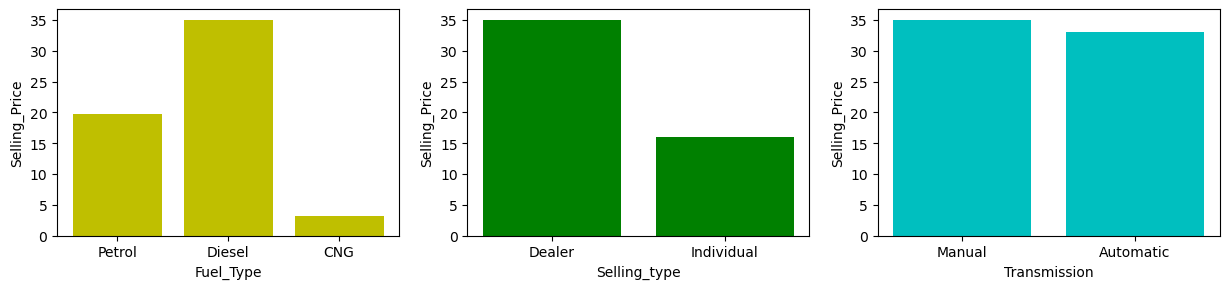

In [9]:
# Barchart

plt.figure(figsize=(15,10))
plt.subplot(331)
plt.bar(df['Fuel_Type'], df['Selling_Price'], color='y')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')

plt.subplot(332)
plt.bar(df['Selling_type'], df['Selling_Price'], color='g')
plt.xlabel('Selling_type')
plt.ylabel('Selling_Price')

plt.subplot(333)
plt.bar(df['Transmission'], df['Selling_Price'], color='c')
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')

plt.show()

#### Boxplot to check outliers

In [10]:
a = df.select_dtypes(exclude='object')
a.shape

(301, 5)

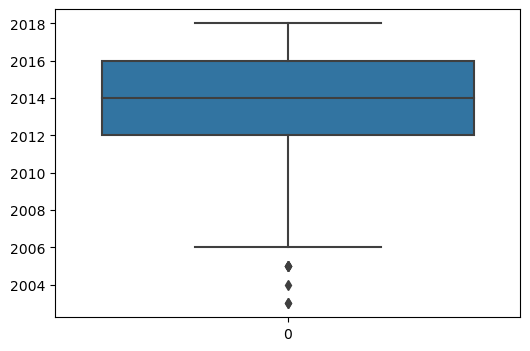

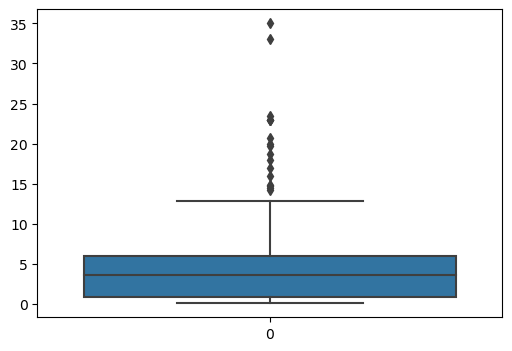

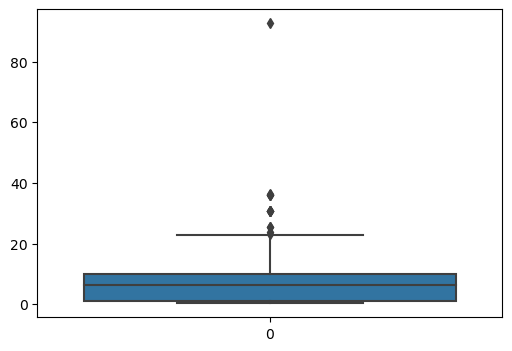

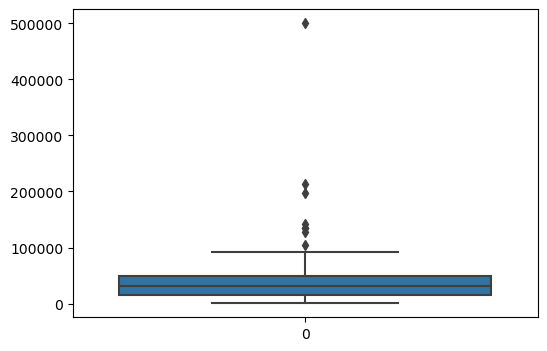

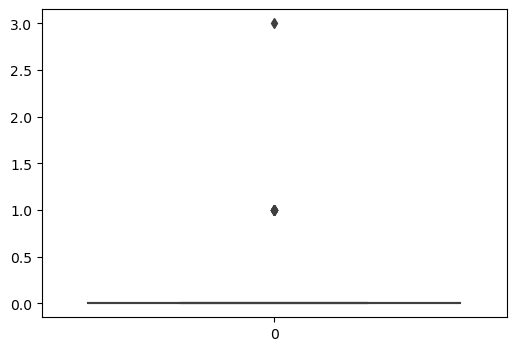

In [11]:
for col in a:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])                                                         # Boxplot: used to find outliers
    plt.show()

#### Caping using IQR method (Handling Outliers)

In [12]:
# capping technique is used to handle the outliers

In [13]:
df_cap = df.copy()

In [14]:
def iqr_capping(df, cols, factor):                                  # handing the outliers
    for col in cols: 
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - (factor * iqr)
        upper_limit = q3 + (factor * iqr)
        
        df[col] = np.where(df[col]>upper_limit, upper_limit, 
                 np.where(df[col]<lower_limit, lower_limit, df[col])) 

In [15]:
iqr_capping(df_cap, a, 1.5)

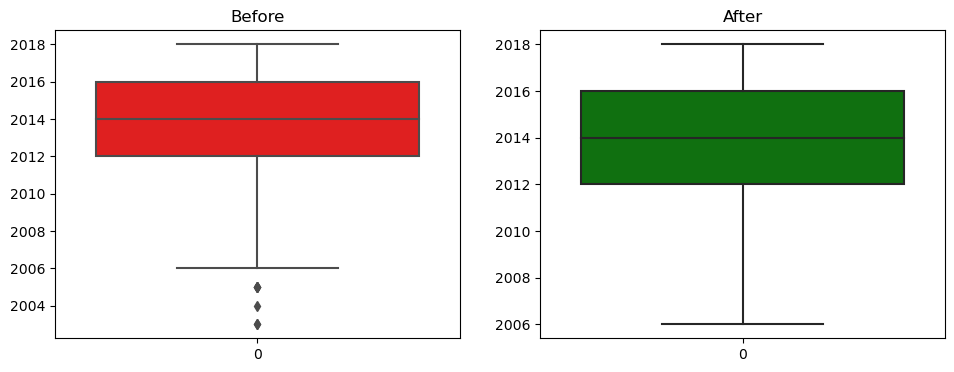

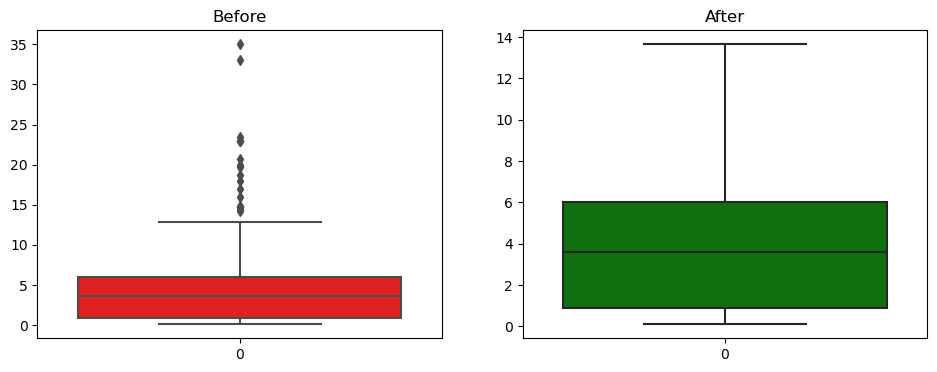

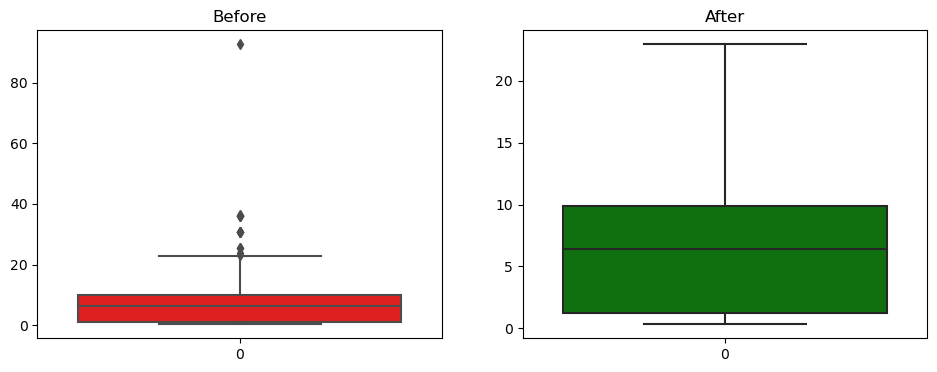

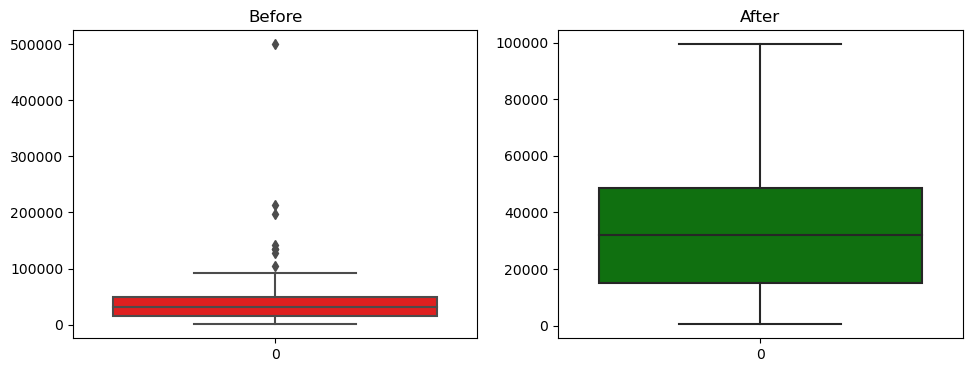

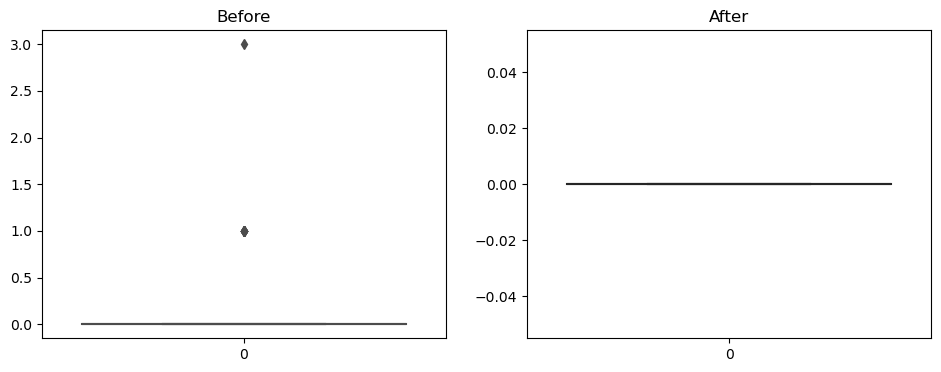

In [16]:
for col in a:
    plt.figure(figsize=(24,4))
    
    plt.subplot(143)
    sns.boxplot(df[col], color='r')
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col], color='g')
    plt.title('After')
    
    plt.show()                                    # price and area

In [17]:
# Outliers has been handled as we can see from above figure

### Working with Categorical Data

In [18]:
b = df.select_dtypes(include='object')              # cat data
b.head()

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [19]:
for i in b:
    print('Feature',i,'= ',b[i].unique())

Feature Car_Name =  ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Stre

In [20]:
# Car_Name is not important and also not has too many unique values so we can drop it

In [21]:
df = df.drop(['Car_Name'], axis=1)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
# for Fuel_Type , Selling_type , Transmission will go with map method

In [23]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
df['Selling_type'] = df['Selling_type'].map({'Dealer':0, 'Individual':1})
df['Transmission'] = df['Transmission'].map({'Manual':0, 'Automatic':1})

In [24]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


### Split the data

In [25]:
# Give independent data to x & dependent data to y
x = df.drop(['Selling_Price'],axis=1)                 # independent 
y = df['Selling_Price']                               # dependent

In [26]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size indicates percentage of values for test i.e, 20% Data = Test & 80% Data = Train

In [27]:
len(X_train) , len(y_train)                   # 80% Random Data selected for train

(240, 240)

In [28]:
len(X_test) , len(y_test)                     # 20% Random Data selected for test

(61, 61)

#### Give data to the model

In [29]:
# Since, dependent data i.e, Selling_price is continous, this falls under regression

In [30]:
# Now, giving training data to train the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , y_train)                    # fit is mediator, gives train data to reg (algorithm: y=mx+c)

LinearRegression()

In [31]:
y_train_pred = reg.predict(X_train)
from sklearn.metrics import r2_score                              #r2_score = used to find accuracy of the model
# find accuracy of train_data
print(f'train accuracy : {r2_score(y_train,y_train_pred)}')

y_test_pred = reg.predict(X_test)
# find accuracy of test_data
print(f'test accuracy : {r2_score(y_test,y_test_pred)}')

train accuracy : 0.8836563703329277
test accuracy : 0.8466902419661766


### Prediction with data

In [32]:
X_train.columns

Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')

In [34]:
print('The Price of Car is',reg.predict([[2017, 9.85, 6900, 0, 0, 0, 0]]))

The Price of Car is [7.0364768]


In [35]:
res = pd.DataFrame({'Actual':y_test, 'prediction':y_test_pred})
res

,Actual,prediction
177,0.35,2.965630
289,10.11,8.300858
228,4.95,6.057828
198,0.15,-1.467368
60,6.95,9.257057
...,...,...
234,5.50,4.498772
296,9.50,8.619307
281,2.10,1.817546
285,7.40,7.672588
